

Step Of Process
1. understand the data. 
2.  preprocess
3. construct the neural network model
4. adding a dropout layer;
5. re-evaluate your new model
6. predictions on the test data
7.  classification report
8.


In [0]:
try:
  # %tensorflow_version only exists in Colab.
  # শুধুমাত্র কোলাবে চেষ্টা করবো টেন্সর-ফ্লো ২.০ এর জন্য
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow is already loaded. Please restart the runtime to change versions.


# Data Set (Fashion-MNIST)

In [0]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

Load the Data in keras dataset

**datasets:** download the data from the server and speeds up the process

In [0]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

**Analyze the Data**

**60000 x 28 x 28** since there are 60,000 training samples each of 28 x 28 dimension.

**10000 x 28 x 28** since there are 60,000 training samples each of 28 x 28 dimension.

In [0]:

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


**Find the unique numbers from the train labels**

In [0]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]



The **output** of above two plots looks like an **ankle boot**.

when (0,0) class is assigned a **class label of 9**.

Text(0.5, 1.0, 'Ground Truth : 9')

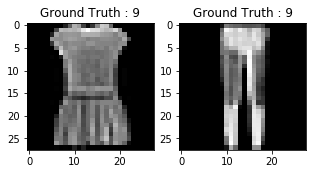

In [0]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[3,:,:], cmap='gray')
#plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[3,:,:], cmap='gray')
#plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Data Preprocessing

1. the images are grayscale images have pixel values that range from 0 to 255. 

2. As a first step, convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1

In [0]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

1. the data right now is in an int8 format.

2. **before you feed** it into the network you need to **convert** its type to **float32**, and you also have to **rescale** the pixel values in range 0 - 1 inclusive.

In [0]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

 **train_Y_one_hot**, which will display a matrix of size 60000 x 10 in which each row depicts one-hot encoding of an image.

In [0]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[9])
print('After conversion to one-hot:', train_Y_one_hot[9])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

**For one last time let's check the shape of training and validation set.**


In [0]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

###The Network
The images are of **size 28 x 28.** You **convert the image matrix to an array,** rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network.

You'll use **three convolutional layers:**

1.The first layer will have **32-3 x 3**filters,

2.The second layer will have **64-3 x 3** filters and

3.The third layer will have **128-3 x 3** filters.

# Model the Data
First, let's import all the necessary modules required to train the model.

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

batch size of 64 using a higher batch size of 128 or 256 is also preferable it all depends on the memory. 

In [0]:
batch_size = 64
epochs = 20
num_classes = 10

# Neural Network Architecture

In Keras, you can just stack up layers by adding the desired layer one by one. That's exactly what you'll do here: you'll first add a first convolutional layer with Conv2D(). Note that you use this function because you're working with images! Next, you add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries. Since you have ten different classes, you'll need a non-linear decision boundary that could separate these ten classes which are not linearly separable.

More specifically, you add Leaky ReLUs because they attempt to fix the problem of dying Rectified Linear Units (ReLUs). The ReLU activation function is used a lot in neural network architectures and more specifically in convolutional networks, where it has proven to be more effective than the widely used logistic sigmoid function. As of 2017, this activation function is the most popular one for deep neural networks. The ReLU function allows the activation to be thresholded at zero. However, during the training, ReLU units can "die". This can happen when a large gradient flows through a ReLU neuron: it can cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope.

Next, you'll add the max-pooling layer with MaxPooling2D() and so on. The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.

In [0]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

# Compile the Model

**Adam optimizer:** https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

After the model is created, you compile it using the Adam optimizer, one of the most popular optimization algorithms. You can read more about this optimizer here. Additionally, you specify the loss type which is categorical cross entropy which is used for multi-class classification, you can also use binary cross-entropy as the loss function. Lastly, you specify the metrics as accuracy which you want to analyze while the model is training.

In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

**visualize the layers**

In [0]:
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)        

# Train the Model

It's finally time to train the model with Keras' **fit()** function! The model trains for 20 epochs. The **fit()** function will return a **history** object; By storying the result of this function in **fashion_train**, you can use it later to plot the accuracy and loss function plots between training and validation which will help you to analyze your model's performance visually.

In [0]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/20





48000/48000 [==============================] - 80s 2ms/step - loss: 0.4641 - acc: 0.8314 - val_loss: 0.3162 - val_acc: 0.8831
Epoch 2/20
48000/48000 [==============================] - 80s 2ms/step - loss: 0.2855 - acc: 0.8960 - val_loss: 0.2685 - val_acc: 0.9033
Epoch 3/20
48000/48000 [==============================] - 79s 2ms/step - loss: 0.2389 - acc: 0.9122 - val_loss: 0.2615 - val_acc: 0.9076
Epoch 4/20
48000/48000 [==============================] - 79s 2ms/step - loss: 0.2063 - acc: 0.9228 - val_loss: 0.2337 - val_acc: 0.9164
Epoch 5/20
48000/48000 [==============================] - 79s 2ms/step - loss: 0.1810 - acc: 0.9329 - val_loss: 0.2207 - val_acc: 0.9223
Epoch 6/20
48000/48000 [==============================] - 80s 2ms/step - loss: 0.1578 - acc: 0.9421 - val_loss: 0.2253 - val_acc: 0.9193
Epoch 7/20
48000/48000 [==

after 20 epochs the training **accuracy is 99%** and the training loss is quite  low its called **overfitting**.

**overfitting :** validation **loss is 0.4396** and the validation **accuracy is 92%**.

**Overfitting** training data very well but is not guaranteed to work on unseen data, and that is why there is a **difference in the training and validation accuracy.**

**adding a Dropout layer to slove this problem**

# Model Evaluation on the Test Set

In [0]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4640991136691533
Test accuracy: 0.9186


Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

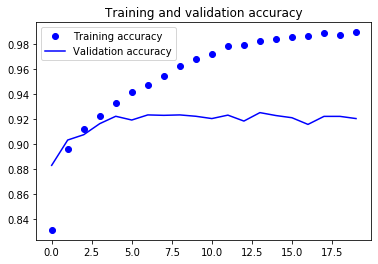

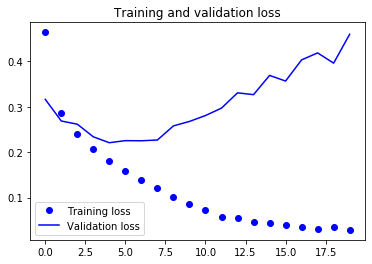

In [0]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Adding Dropout into the Network

You can add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount. How many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly. This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.

So let's create, compile and train the network again but this time with dropout. And run it for 20 epochs with a batch size of 64.

In [0]:
batch_size = 64
epochs = 20
num_classes = 10

In [0]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
fashion_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)         

In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 89s 2ms/step - loss: 0.5875 - acc: 0.7807 - val_loss: 0.3555 - val_acc: 0.8668
Epoch 2/20
48000/48000 [==============================] - 89s 2ms/step - loss: 0.3757 - acc: 0.8625 - val_loss: 0.2993 - val_acc: 0.8873
Epoch 3/20
48000/48000 [==============================] - 89s 2ms/step - loss: 0.3307 - acc: 0.8783 - val_loss: 0.2849 - val_acc: 0.8917
Epoch 4/20
48000/48000 [==============================] - 89s 2ms/step - loss: 0.3042 - acc: 0.8872 - val_loss: 0.2564 - val_acc: 0.9040
Epoch 5/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.2821 - acc: 0.8963 - val_loss: 0.2536 - val_acc: 0.9052
Epoch 6/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.2680 - acc: 0.9010 - val_loss: 0.2532 - val_acc: 0.9051
Epoch 7/20
48000/48000 [==============================] - 89s 2ms/step - loss: 0.2597 - acc: 0.9031 - val_loss: 0.2301 - val_acc

In [0]:
fashion_model.save("fashion_model_dropout.h5py")

### Model Evaluation on the Test Set

Finally, let's also evaluate your new model and see how it performs!

In [0]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 6s 572us/step


In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.21930889983177185
Test accuracy: 0.9215


Wow! Looks like adding Dropout in our model worked, even though the test accuracy did not improve significantly but the test loss decreased compared to the previous results.

Now, let's plot the accuracy and loss plots between training and validation data for the one last time.

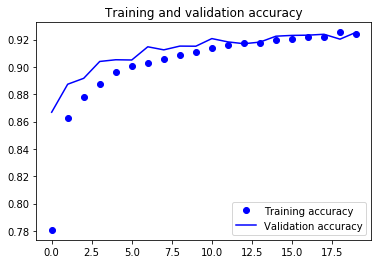

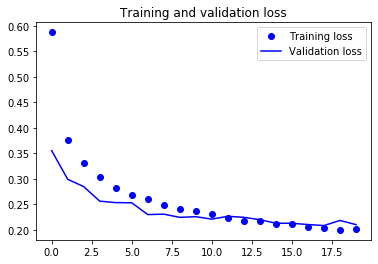

In [0]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Finally**, you can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that your model is not overfitting: the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.

# Predict Labels

**np.argmax()** to select the index number which has a higher value in a row.

For example, let's assume a prediction for one test image to be **0 1 0 0 0 0 0 0 0 0,** the output for this should be a class label **1**.

In [0]:
predicted_classes = fashion_model.predict(test_X)

In [0]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [0]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9174 correct labels


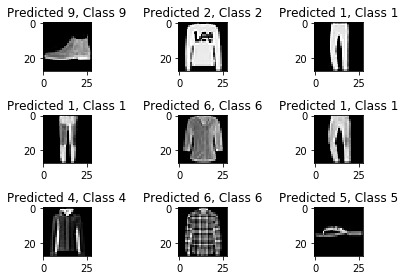

In [0]:
correct = np.where(predicted_classes==test_Y)[0]
print( "Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 826 incorrect labels


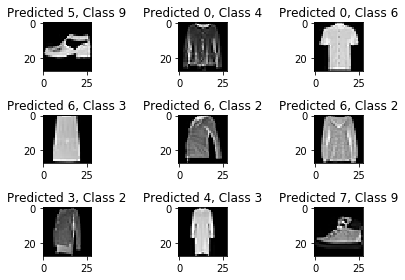

In [0]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

# Classification Report

Classification report will help us in identifying the misclassified classes in more detail. You will be able to observe for which class the model performed bad out of the given ten classes.

In [0]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.92      0.84      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.91      0.84      0.88      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.86      0.90      0.88      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.82      0.72      0.76      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

